In [17]:
from SpaJava import allocpop
import matplotlib.pyplot as plt
import numpy as np

In [3]:
readme_demo = allocpop.JavaPolygonPrepare()

## Polygon Analysis (failed)

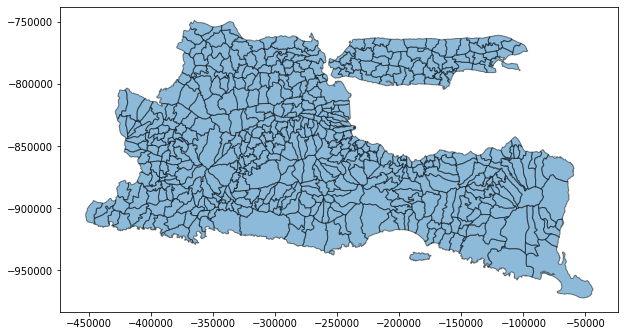

In [7]:
data = readme_demo.shp_read()

In [9]:
data.size

23520

980

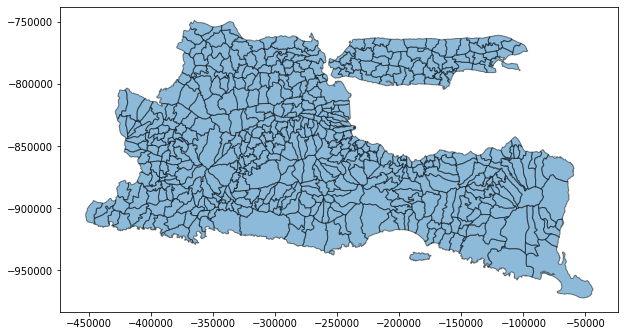

In [14]:
data = readme_demo.data_clean(readme_demo.java_shp, show=True)
data.size

### intersect 
create intersect of two polygons

In [21]:
intersect_data = readme_demo.intersect()

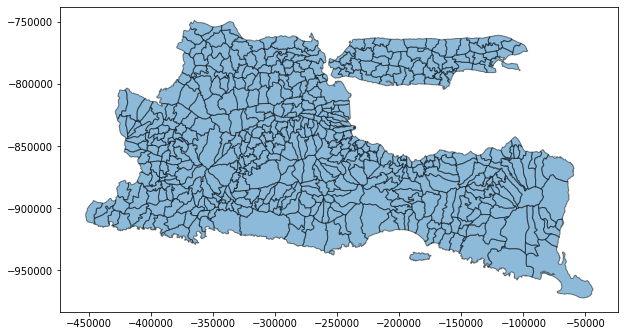

In [17]:
readme_demo.fig_show(intersect_data)

### conv_raster
this one largely failed

In [19]:
readme_demo.conv_raster

<bound method JavaPolygonPrepare.conv_raster of <SpaJava.allocpop.JavaPolygonPrepare object at 0x000001D0E60E06C8>>





## JavaRasterPrepare
prepare the raster file that we want 

In [3]:
readme_demo2 = allocpop.JavaRasterPrepare()

.img is the data we want to analysis

In [4]:
img = readme_demo2.img
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

It is not very clean, as the -infinate stand for NaN value, so we could do data cleaning

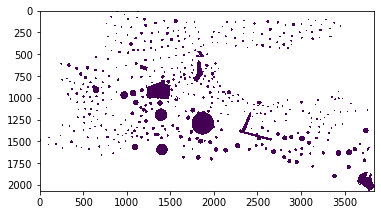

In [6]:
readme_demo2.raster_show(lg=False)

caculate the total value of the whole raster:

In [9]:
total_population = readme_demo2.total_pop()
total_population

21553836.0

## neo_dilation
The following func could dilation the raster without turning it into binary file

In [10]:
img = readme_demo2.neo_dilation(repeat = 60)

In [16]:
img

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ..., 1284.9521, 1284.9521,
        1284.9521],
       [      nan,       nan,       nan, ..., 1284.9521, 1284.9521,
        1284.9521],
       [      nan,       nan,       nan, ..., 1284.9521, 1284.9521,
        1284.9521]], dtype=float32)

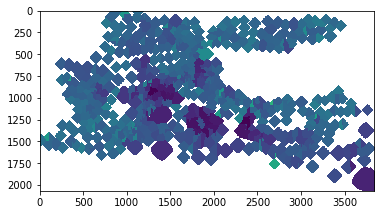

In [18]:
plt.imshow(np.log(img+1))

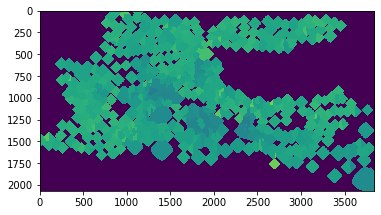

In [20]:
plt.imshow(np.log(readme_demo2.img+1))

In [107]:
img = np.where(np.isnan(img),0,img)

## block_split
based on this map, creat a binary map divide different blocks

In [23]:
bw = readme_demo2.block_split()

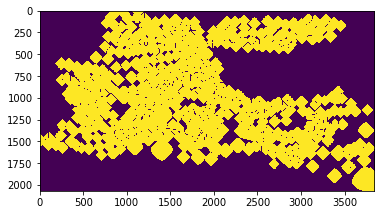

In [24]:
plt.imshow(bw)

## smooth_raster
make the raster more smooth...

In [25]:
smooth_raster = readme_demo2.smoothen_raster(bw)

270174
431209
587176
738026
884338


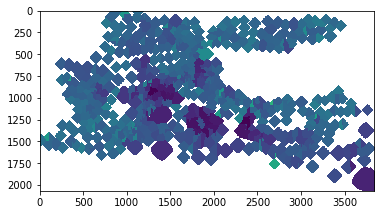

In [26]:
fig = np.log(smooth_raster+1)
plt.imshow(np.where(fig == 0, np.NaN, fig))

## neo_erosion_raster
generate the analysis unit for our final purposes

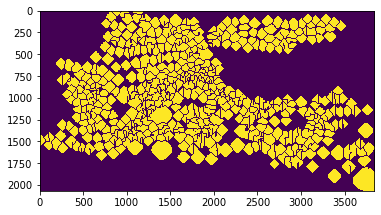

In [29]:
new_bw = readme_demo2.neo_erosion_raster(bw)

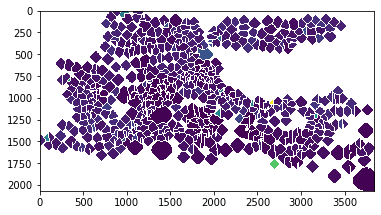

In [34]:
final_non_binary_raster = new_bw*smooth_raster
final_non_binary_raster = np.where(final_non_binary_raster==0,
                                   np.NaN,final_non_binary_raster)
plt.imshow(final_non_binary_raster)